In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from scipy.stats import multivariate_normal
from scipy.ndimage.filters import gaussian_filter


<ipython-input-16-48c26abee727>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# Generate Swarm randomly with some boundness;

In [ ]:
def generate_swarm(M,deviation, central_point):
    np.random.seed(1603)
    print(f'The random selected devation of users position from the center of the swarm is {deviation};')
    data_points = central_point + deviation * np.random.randn(M, 2)
    return data_points

M,deviation, central_point = 10, random.uniform(4.0,6.0), np.array([15.0, 13.0])
data_points = generate_swarm(M,deviation, central_point)

print("Generated Data Points:")
print(data_points)

The random selected devation of users position from the center of the swarm is 4.271617643970085;
Generated Data Points:
[[10.65773869 17.71191834]
 [19.15342723 11.24407071]
 [ 6.38132862 12.90288351]
 [16.25673271 15.05876613]
 [15.65365731 13.10012239]
 [12.12213622 16.11851755]
 [16.11048527 18.24192404]
 [19.05692928  6.47894015]
 [14.96295953 15.06976192]
 [17.39886792  7.80408057]]


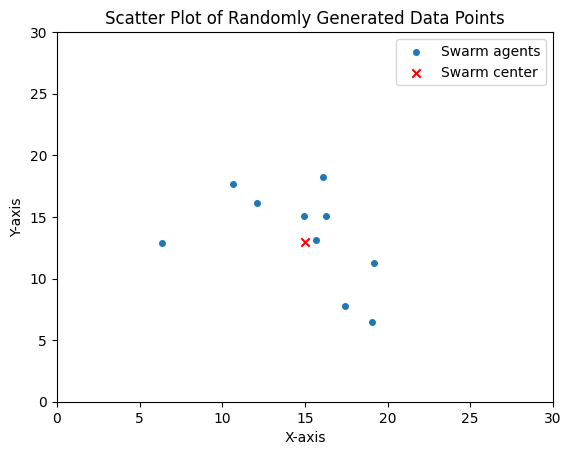

In [ ]:
# Scatter
plt.scatter(data_points[:, 0], data_points[:, 1], label='Swarm agents', marker ='o',s=16)
plt.scatter(central_point[0], central_point[1], color='red', marker='x', label='Swarm center')
plt.title('Scatter Plot of Randomly Generated Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0,30)
plt.ylim(0, 30)
plt.legend(loc='best')
plt.show()

In [ ]:
def g(y, a, b, c):
    return -y * (a - (b * np.exp(-(np.linalg.norm(y)**2) / c)))


def g_pair(swarm, a, b, c):
    M, _ = swarm.shape
    g_pair = []
    for i in range(M):
      sum = 0
      for j in range(M):
        if j != i:
          diff = swarm[j] - swarm[i] #due to the fact that we do x_j-x_i (odd function) we need to put a minus in front of g()
          sum += g(diff, a, b, c) #sum of g(all the differences of j different from i)
      g_pair.append(sum)
    return np.array(g_pair).reshape(M,2)

# set parameters of normalization, attraction and repulsion;
attraction_value, repulsion_value, c_value = 0.01, 0.4, 0.01
inter = g_pair(data_points, attraction_value, repulsion_value, c_value)

Let's take a look to the behaviour of the swarm agents just due to attraction/repulsion forces given by $g()$ function;  
Basically we want to see how the size of the swarm changes with different values of $a$ and $b$.

In [ ]:
def swarm_size(swarms, iterations, interactions_values):

  attraction_value, repulsion_value, c_value = interactions_values
  positions = []
  interactions = []
  positions.append(swarms) #append starting position of the agents
  #inter = g_pair(swarms, attraction_value, repulsion_value, c_value)
  #interactions.append(inter)

  for k in range(iterations):
     g_ = g_pair(positions[-1], attraction_value, repulsion_value, c_value) #this get back a matrix (Mx2)
     interactions.append(g_)

     step = positions[-1] - interactions[-1]
     positions.append(np.round(step,decimals=12))
     #Let's plug the agents positions updates in a dictionary
     agents = {}
     for agent in range(M):
       swrm = {f'Agent {agent}': np.array([i[agent] for i in positions])}
       agents.update(swrm)
  return(agents)

inter_values = [0.001,0.4,0.01] #attraction_value, repulsion_value, c_value
inter_values2 = [0.01,0.4,0.01]
inter_values3 = [0.001,0.6,1]
inter_values4 = [0.01,0.6,1]

n_iter = 55
sw_size = swarm_size(data_points,n_iter,inter_values)
sw_size2 = swarm_size(data_points, n_iter, inter_values2)
sw_size3 = swarm_size(data_points,n_iter, inter_values3)
sw_size4 = swarm_size(data_points,n_iter, inter_values4)
#sw_size['Agent 0'][::15]


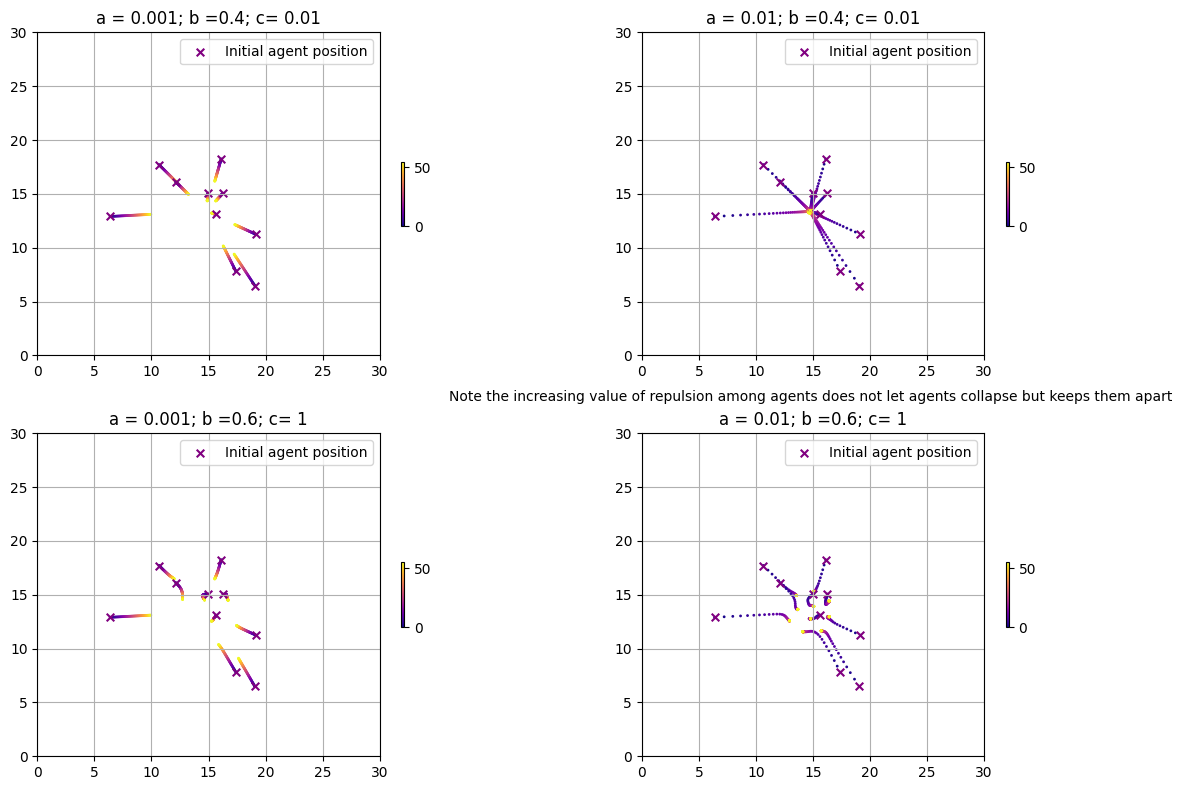

In [ ]:
x_coordinates = [point[0] for point in data_points]
y_coordinates = [point[1] for point in data_points]


def plot_agent_motion(ax, data, x_coordinates, y_coordinates, title, inter_values):
    for agent_id in range(M):
        agent_data = data[f'Agent {agent_id}']
        x = agent_data[:, 0]
        y = agent_data[:, 1]
        time = np.arange(len(x))
        ax.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)

    ax.scatter(x_coordinates, y_coordinates, marker='x', s=30, color='purple', label='Initial agent position')
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.colorbar = plt.colorbar(ax.collections[0], shrink=0.2)
    ax.set_title(f'a = {inter_values[0]}; b ={inter_values[1]}; c= {inter_values[2]}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()
    ax.grid(True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

plot_agent_motion(ax1, sw_size, x_coordinates, y_coordinates, 'Motion of Agents 1', inter_values)
plot_agent_motion(ax2, sw_size2, x_coordinates, y_coordinates, 'Motion of Agents 2', inter_values2)
plot_agent_motion(ax3, sw_size3, x_coordinates, y_coordinates, 'Motion of Agents 3', inter_values3)
plot_agent_motion(ax4, sw_size4, x_coordinates, y_coordinates, 'Motion of Agents 4', inter_values4)

#ax2.text(0.5, 1.1, 'Repulsion not enough to avoid agents collision!', transform=ax4.transAxes, ha='center')
ax4.text(0.5, 1.1, 'Note the increasing value of repulsion among agents does not let agents collapse but keeps them apart ', transform=ax4.transAxes, ha='center')

plt.tight_layout()
plt.show()


#Motion along a plane profile $\sigma()$

In [ ]:
def grad_plane_profile(data_points, a, b):
    def calculate_derivative(y):
        sigma = np.dot(np.transpose(a), y) + b
        d_sigma_dy = a # Derivative of sigma with respect to each swarm agent
                       # note that here the foraging herd moves in a constant direction (while
                       # keeping its cohesiveness) with a constant speed toward favorable regions;
        return d_sigma_dy

    result = np.apply_along_axis(calculate_derivative, axis=1, arr=data_points)
    return result

In [ ]:
a_coeff, b_coeff = [0.1, 0.2], 1
grad_plane_profile(data_points,a_coeff,b_coeff)

array([[0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2],
       [0.1, 0.2]])

- ITERATIVELY THE INDIVIDUAL MOTION IS DESCRIBED AS
: \
$$x^{[k+1]} = x^{[k]} - ∇_{x_i} \sigma(x^i) - ϵ \sum_{j=1,j \neq i}^M g(x_j^{[k]}-x_i^{[k]})$$
because attraction-repulsion function $g()$ it's an odd function so $g(y)=-g(-y)$; \
Notice that we use this form only for simplicity of implementation.
- SWARM CENTER IS DEFINED AS:\
$$\bar{x}=-\frac{1}{M} \sum_{i=1}^M \nabla_{x^i} \sigma\left(x^i\right)$$

In [ ]:
#Define a function to explain center of the swarm motion;
def center_swarm_motion(swarm , center, iter, a_sigma, b_sigma):
  center_direction = []
  center_direction.append(center)

  for k in range(iter):
      grad = grad_plane_profile(swarm,a_sigma,b_sigma)
      step = center_direction[k-1] - grad
      step_medio= np.mean(step, axis=0)
      center_direction.append(np.round(step_medio,decimals=6))

  return(center_direction)


In [ ]:
a_, b_ = [0.1,0.2],1
center_path = center_swarm_motion(data_points, central_point, 10, a_, b_)
center_path

[array([15., 13.]),
 array([14.9, 12.8]),
 array([14.9, 12.8]),
 array([14.8, 12.6]),
 array([14.8, 12.6]),
 array([14.7, 12.4]),
 array([14.7, 12.4]),
 array([14.6, 12.2]),
 array([14.6, 12.2]),
 array([14.5, 12. ]),
 array([14.5, 12. ])]

In [ ]:
def individual_motion(swarms, iterations, epsilon, a_sigma,b_sigma, interactions_values):
  '''
  sigma : envoiromment function;
  g() : LINEAR attraction/ BOUNDED repulsion
        among swarm agents;
  swarms : agent's coordinates according
        to cohesion analysis;
  epsilon : learning rate;
  return : the gradient search toward favorable region for
          i^th agent of the system;
  '''
  attraction_value, repulsion_value, c_value = interactions_values
  desc_direction = []
  interactions = []
  desc_direction.append(swarms) #append starting position of the agents
  inter = g_pair(swarms, attraction_value, repulsion_value, c_value)
  interactions.append(inter)


  for k in range(iterations):
     grad = grad_plane_profile(desc_direction[k-1],a_sigma,b_sigma) #qui hai cambiato era swarms !!!!!!!

     g_ = g_pair(interactions[k-1], attraction_value, repulsion_value, c_value) #this get back a matrix (Mx2)
     interactions.append(g_)
     step = desc_direction[k-1] - grad - (epsilon * interactions[k-1])
     desc_direction.append(np.round(step,decimals=8))
     #Let's plug the agents positions updates in a dictionary
     agents = {}
     for agent in range(M):
       swrm = {f'Agent {agent}': np.array([i[agent] for i in desc_direction])}
       agents.update(swrm)
  return(agents)



In [ ]:
a_coeff, b_coeff = [0.1,0.2],1
a_coeff_high = [0.5,1.0]
inter_values = [0.091,0.4,0.01] #attraction_value, repulsion_value, c_value
learning_rate = .1

gradient_method_low = individual_motion(data_points, 150, learning_rate, a_coeff, b_coeff, inter_values)
gradient_method_high = individual_motion(data_points, 150, learning_rate, a_coeff_high, b_coeff, inter_values)

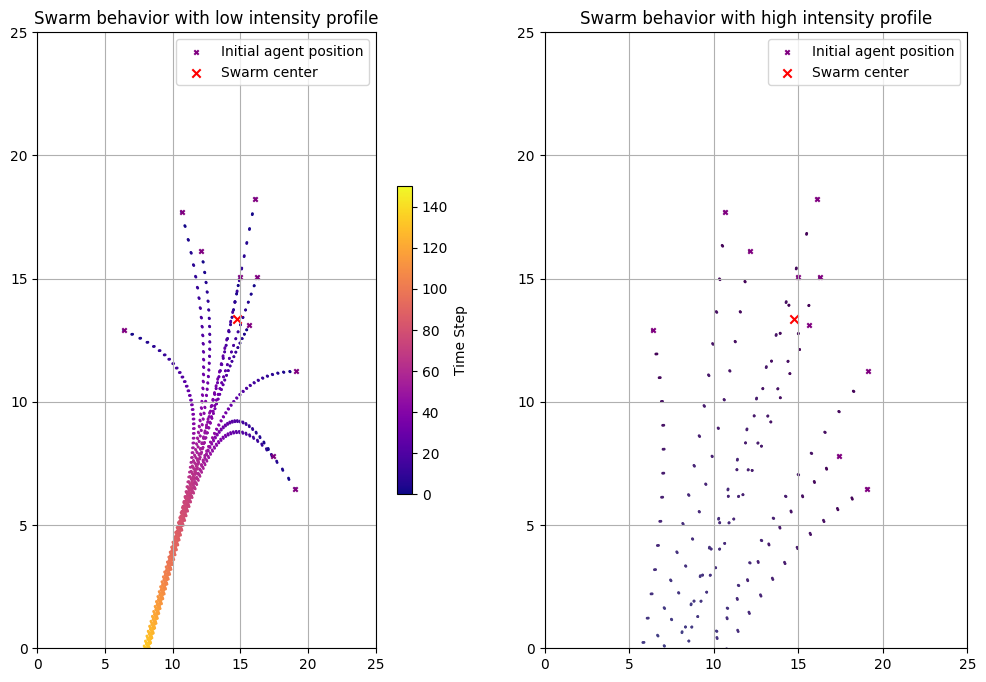

In [ ]:
# Initial positions of agents
agents_low = [gradient_method_low[f'Agent {i}'][0] for i in range(10)]
agents_high = [gradient_method_high[f'Agent {i}'][0] for i in range(10)]
# Extract central point
central_point = np.mean(agents_low, axis=0)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot the motion of all agents on the first subplot
for agent_id in range(10):
    data = gradient_method_low[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax1.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)

# for c in center_low:
#     c1,c2 = c[0],c[1]
#     ax1.scatter(c1, c2, color='red', marker='x', s=10)


# Plot initial positions of agents with a different marker
x_coordinates = [point[0] for point in agents_low]
y_coordinates = [point[1] for point in agents_low]
ax1.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agent position')

# Plot central point to identify the center with respect to the swarm tends to aggregate
ax1.scatter(central_point[0], central_point[1], color='red', marker='x', label='Swarm center')

ax1.set_xlim(0, 25)
ax1.set_ylim(0, 25)
ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step',shrink=0.5)
ax1.set_title('Swarm behavior with low intensity profile')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend()
ax1.grid(True)

# Plot another set of data on the second subplot
# Assuming you have another set of data stored in another variable (e.g., gradient_method_steps_2)
# Modify this part according to your actual use case
for agent_id in range(10):
    data = gradient_method_high[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax2.scatter(x, y, c=time, cmap='viridis', marker='o', s=1)
# for c in center_high:
#     c1,c2 = c[0],c[1]
#     ax2.scatter(c1, c2, color='red', marker='x', s=10)

ax2.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agent position')
ax2.scatter(central_point[0], central_point[1], color='red', marker='x', label='Swarm center')
ax2.set_xlim(0, 25)
ax2.set_ylim(0, 25)
#ax2.colorbar = plt.colorbar(ax2.collections[0], label='Time Step')
ax2.set_title('Swarm behavior with high intensity profile')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

# # Save the figure
# fig.savefig('motion_plots.png')

# Show the figure
plt.show()


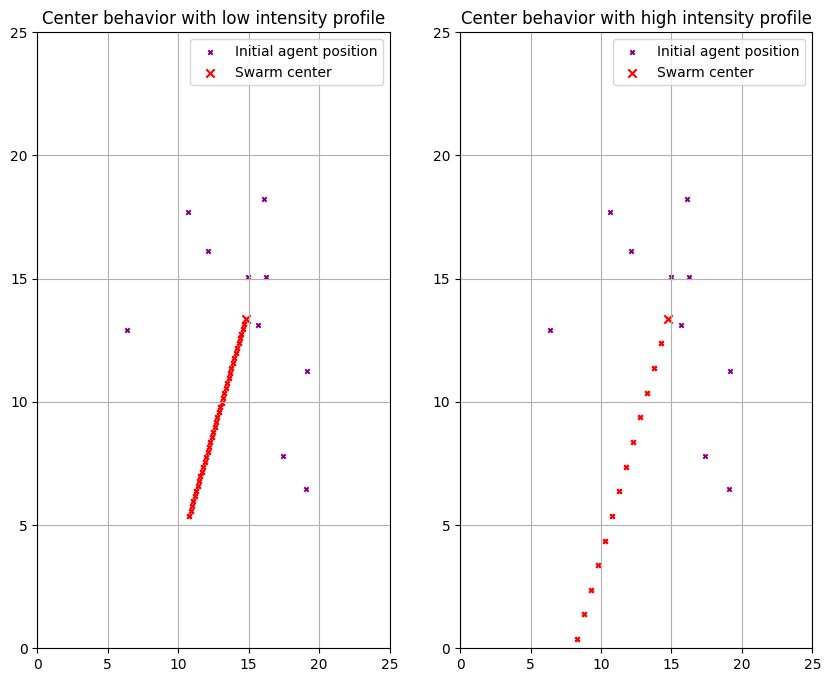

In [ ]:
#Path of the center
center_low= center_swarm_motion(data_points, central_point, 80, a_coeff, b_coeff)
center_high = center_swarm_motion(data_points, central_point, 80, a_coeff_high, b_coeff)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

for c in center_low:
    c1,c2 = c[0],c[1]
    ax1.scatter(c1, c2, color='red', marker='x', s=10)

for c in center_high:
    c1,c2 = c[0],c[1]
    ax2.scatter(c1, c2, color='red', marker='x', s=10)

# # Plot initial positions of agents with a different marker
x_coordinates = [point[0] for point in agents_low]
y_coordinates = [point[1] for point in agents_low]
ax1.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agent position')
ax2.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agent position')
# Plot central point to identify the center with respect to the swarm tends to aggregate
ax1.scatter(central_point[0], central_point[1], color='red', marker='x', label='Swarm center')
ax2.scatter(central_point[0], central_point[1], color='red', marker='x', label='Swarm center')

ax1.set_xlim(0, 25)
ax1.set_ylim(0, 25)
#ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax1.set_title('Center behavior with low intensity profile')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend()
ax1.grid(True)

ax2.set_xlim(0, 25)
ax2.set_ylim(0, 25)
#ax2.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax2.set_title('Center behavior with high intensity profile')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

The simulation example above use as $\sigma(x^i)$ to describe the envoiromment profile of the swarm a 2D plane.

We chose an n = 2 dimensional space for ease of visualization of the results and used the region $[0,30]×[0,30]$ as developed in the Gazi paper. In our example $M$ = 10 individuals and as parameters of the attraction/repulsion
function $g(·) we used a = 0.09 (attraction parameter), b = 0.4 (repulsion among agents in the short dinstances), and c = 0.01.

The plots are referred to two different plane profiles:
- LOW INTENSITY PROFILE:\
 with $a_{\sigma}$ = [0.1,0.2] ;
- HIGH INTENSITY PROFILE:\
 with $a_{\sigma}$ = [0.5,1];\

 $b_{\sigma}$ =1 for both profile scenarios;


One easily can see that in both of the cases, as expected, individuals move along the gradient $-∇_{x^i} \sigma(x^i)$. Note that initially for the case $a_{\sigma}$ = [0.1,0.2]
some of the individuals move in a direction opposite to the negative gradient. This is because the interindividual attraction is much
stronger than the intensity of the profile. In contrast, for the $a_{\sigma}$ = [0.5,1]
case, the intensity of the profile is high
enough to dominate the interindividual attraction.


# ***.QUADRATIC ATTRACTANT/REPELLENT PROFILE***

$$\sigma(y)= \frac{A_{\sigma}}{2} ||y-c_{\sigma}||^2+b_{\sigma}  $$
$$\nabla_y \sigma(y) = A_{\sigma}(y-c_{\sigma})$$

Recalling also that: \
$$\bar{x}^{[k+1]} = \bar{x}^{[k]} - \frac{1}{M} \sum_{i=1}^{M} \nabla_{x_i} \sigma(x_i) $$


In [ ]:
def grad_quadratic(data, A, c):
  gradient = []
  M,_ = data.shape
  for i in data:
    diff = (i - c)
    # print(diff)
    # print('-----')
    grad = diff*A
    gradient.append(grad)
  res =np.array(gradient).reshape(M,_)

  return res

# grad_quadratic(df,A,c)


In [ ]:
#Define a function to explain center of the swarm motion;
def quadratic_center_motion(swarm , A_sigma, c_sigma):
  M,_ = swarm.shape
  center_direction = []
  center_direction.append(np.mean(swarm,axis=0))

  for k in range(M):
      grad = grad_quadratic(swarm, A_sigma, c_sigma)
      grad_medio= np.mean(grad, axis=0)
      step = center_direction[-1] - grad_medio
      #center_direction.append(step)

  return step #(center_direction)


#-------------------------------------------------------------------------------
def individual_convex_motion(swarms, iterations, epsilon, A_sigma,c_sigma, interactions_values):

  attraction_value, repulsion_value, c_value = interactions_values
  desc_direction = []
  center_direction = []
  interactions = []
  desc_direction.append(swarms) #append starting position of the agents
  inter = g_pair(swarms, attraction_value, repulsion_value, c_value)
  interactions.append(inter)


  for k in range(iterations):
     grad = grad_quadratic(desc_direction[k-1], A_sigma, c_sigma) #Compute the gradient each time on the updated position of the agents
    #  print(grad)
    #  print('----')
     g_ = g_pair(interactions[k-1], attraction_value, repulsion_value, c_value) #this get back a matrix (Mx2)
     interactions.append(g_)

     step = desc_direction[k-1] - grad - (epsilon * interactions[k-1])
     desc_direction.append(step)

     #let's compute the update of the center motion
     center_path = quadratic_center_motion(desc_direction[-1], A_sigma, c_sigma)
     #print(center_path)
     center_direction.append(center_path)

     #Let's plug the agents positions updates in a dictionary
     agents = {}
     for agent in range(M):
       swrm = {f'Agent {agent}': np.array([i[agent] for i in desc_direction])}
       agents.update(swrm)
  return agents,center_direction



In [ ]:
# A_sigma, c_sigma = 0.0094, np.array([20 ,20])
A_sigma, c_sigma = 0.02, np.array([20 ,20])
inter_values = [0.091,0.4,0.01] #attraction_value, repulsion_value, c_value
learning_rate = .1

In [ ]:
quadratic_motion,q_center = individual_convex_motion(data_points, 1000, learning_rate, A_sigma,c_sigma, inter_values)
quadratic_motion_neg, q_center_neg = individual_convex_motion(data_points, 1000, learning_rate, -A_sigma,c_sigma, inter_values)
#quadratic_motion['Agent 0'][:10]

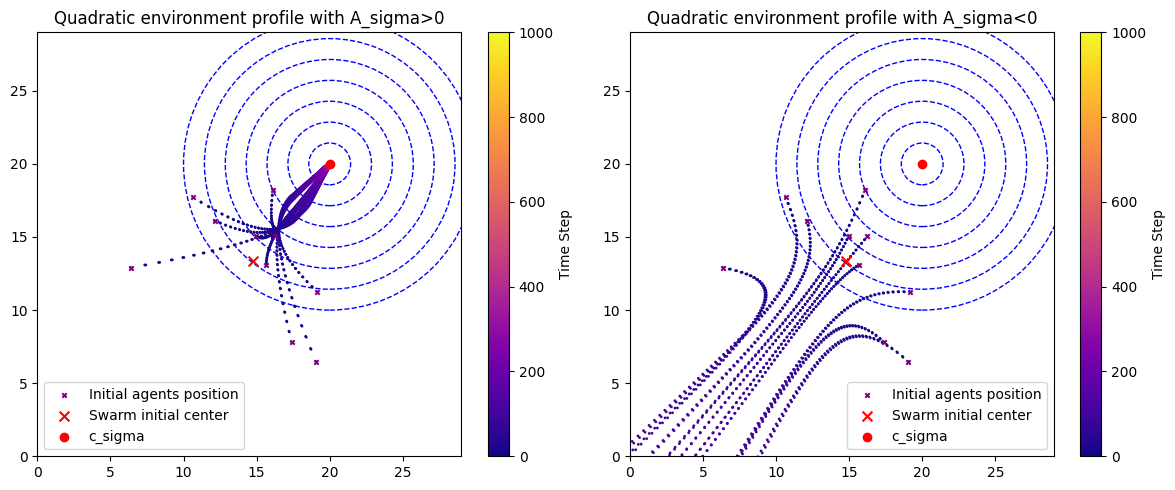

In [ ]:
agents_sw = [quadratic_motion[f'Agent {i}'][0] for i in range(10)]
raggi = np.linspace(0, 10, 8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot in the first subplot
ax1.set_xlim(0, 29)
ax1.set_ylim(0, 29)
for raggio in raggi:
    cerchio = plt.Circle(c_sigma, raggio, fill=False, color='blue', linestyle='dashed')
    ax1.add_patch(cerchio)

for agent_id in range(M):
    data = quadratic_motion[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax1.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
x_coordinates = [point[0] for point in agents_sw]
y_coordinates = [point[1] for point in agents_sw]
ax1.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agents position')
ax1.scatter(central_point[0], central_point[1], color='red', marker='x', s=50, label='Swarm initial center')
ax1.scatter(*c_sigma, marker='o', color='red', label='c_sigma')
ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Quadratic environment profile with A_sigma>0')
ax1.legend()

# Plot in the second subplot
ax2.set_xlim(0, 29)
ax2.set_ylim(0, 29)
for raggio in raggi:
    cerchio = plt.Circle(c_sigma, raggio, fill=False, color='blue', linestyle='dashed')
    ax2.add_patch(cerchio)
for agent_id in range(M):
    data = quadratic_motion_neg[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax2.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
x_coordinates = [point[0] for point in agents_sw]
y_coordinates = [point[1] for point in agents_sw]
ax2.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agents position')
ax2.scatter(central_point[0], central_point[1], color='red', marker='x', s=50, label='Swarm initial center')
ax2.scatter(*c_sigma, marker='o', color='red', label='c_sigma')
ax2.colorbar = plt.colorbar(ax2.collections[0], label='Time Step')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Quadratic environment profile with A_sigma<0')
ax2.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


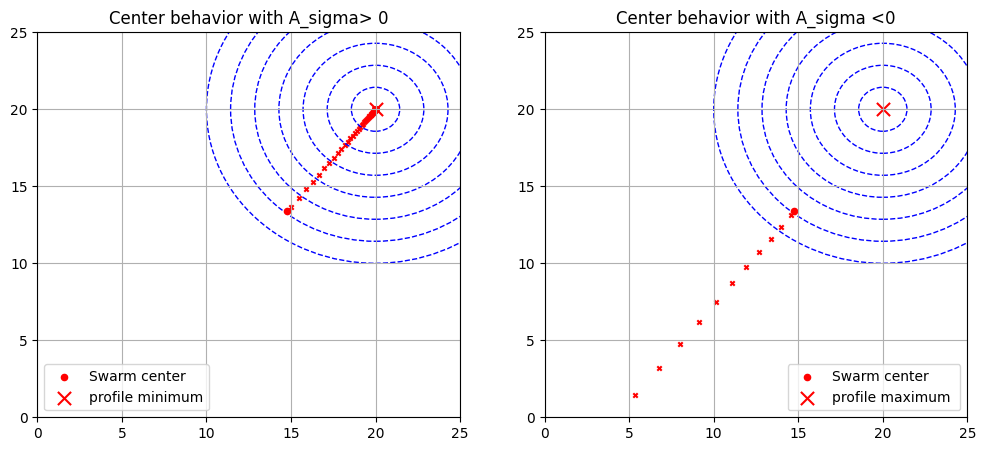

In [ ]:
#MOTION OF THE CENTER OF THE SWARM
# #central_point
# iterazioni=210
# center_ = quadratic_center_motion(data_points , central_point, iterazioni, -A_sigma, c_sigma)
# center = quadratic_center_motion(data_points , central_point, iterazioni, A_sigma, c_sigma)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for c in q_center[::10]:
    c1,c2 = c[0],c[1]
    ax1.scatter(c1, c2, color='red', marker='x', s=10)
for raggio in raggi:
    cerchio = plt.Circle(c_sigma, raggio, fill=False, color='blue', linestyle='dashed')
    ax1.add_patch(cerchio)
for c in q_center_neg[::10]:
    c1,c2 = c[0],c[1]
    ax2.scatter(c1, c2, color='red', marker='x', s=10)
for raggio in raggi:
    cerchio = plt.Circle(c_sigma, raggio, fill=False, color='blue', linestyle='dashed')
    ax2.add_patch(cerchio)

# Plot central point to identify the center with respect to the swarm tends to aggregate
ax1.scatter(central_point[0], central_point[1], color='red', marker='o',s=20, label='Swarm center')
ax2.scatter(central_point[0], central_point[1], color='red', marker='o',s=20, label='Swarm center')
ax1.scatter(c_sigma[0],c_sigma[1], color='red', marker='x',s=90, label='profile minimum')
ax2.scatter(c_sigma[0],c_sigma[1], color='red', marker='x',s=90, label='profile maximum ')
ax1.set_xlim(0, 25)
ax1.set_ylim(0, 25)
#ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax1.set_title('Center behavior with A_sigma> 0')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend()
ax1.grid(True)

ax2.set_xlim(0, 25)
ax2.set_ylim(0, 25)
#ax2.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax2.set_title('Center behavior with A_sigma <0')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

# Gaussian Attractant/Repellent profile
 $\sigma(y)= - \frac{A_{\sigma}}{2} \exp(\frac{||y-c_{\sigma}||^2}{l_{\sigma}}) $

plottare due gaussiane una con a_sigma positivo ed uno negativo e far vedere che una sarebbe una hill e una un hole

In [ ]:
def grad_gaussian(data, A_sigma, l_sigma, c_sigma):
  gradient = []
  M,_ = data.shape
  ratio = A_sigma/l_sigma
  for y in data:
    diff = (y - c_sigma)
    exponent = -(np.linalg.norm(y-c_sigma)**2)/l_sigma
    # print(diff)
    # print('-----')
    grad = ratio*(diff)*(np.exp(exponent))
    gradient.append(grad)
  res =np.array(gradient).reshape(M,_)

  return res

#Define a function to explain center of the swarm motion;
def gaussian_center_motion(swarm ,A_sigma,l_sigma, c_sigma):
  center = np.mean(swarm, axis=0)
  summation = 0
  M,_ = swarm.shape
  ratio =  (A_sigma/(M * l_sigma))
  for x_i in swarm:
    diff = x_i - c_sigma
    #print(diff)
    e = -(np.linalg.norm(diff)**2)/l_sigma
    exp = np.exp(e)
    summation += diff*exp

  grad_mean = (-ratio) * summation
  # print(grad_mean)
  motion = center - grad_mean
  # center_direction.append(motion)

  return motion #center_direction

# gaussian_center_motion(data_points,2,20,np.array([20,20]))

In [ ]:
def gaussian_motion(swarms, iterations, epsilon, A_sigma,c_sigma,l_sigma, interactions_values):
  #unpack interactions coefficients and initialize empty lists to store directions of center and agents of the swarm
  attraction_value, repulsion_value, c_value = interactions_values
  center_direction = []
  desc_direction = []
  interactions = []
  center_direction.append(np.mean(swarms,axis=0)) #append starting center position of the swarm
  desc_direction.append(swarms) #append starting position of the agents
  inter = g_pair(swarms, attraction_value, repulsion_value, c_value) #compute g() starting attraction/repulsion function
  interactions.append(inter)


  for k in range(iterations):
    grad = grad_gaussian(desc_direction[k-1], A_sigma, l_sigma, c_sigma) #Compute the gradient each time on the updated position of the agents in the profile;
    #  print(grad)
    #  print('----')
    g_ = g_pair(interactions[k-1], attraction_value, repulsion_value, c_value) #this get back a matrix (Mx2)
    interactions.append(g_)

    step = desc_direction[k-1] - grad - (epsilon * interactions[k-1])
    desc_direction.append(step)
    #let's compute the update of the center motion
    center_path = gaussian_center_motion(desc_direction[-1], A_sigma,l_sigma, c_sigma)
    #print(center_path)
    center_direction.append(center_path)


    #Let's plug the agents positions updates in a dictionary
    agents = {}
    for agent in range(M):
      swrm = {f'Agent {agent}': np.array([i[agent] for i in desc_direction])}
      agents.update(swrm)

  return(agents, center_direction)

In [ ]:
learning_rate, A_sigma, c_sigma,l_sigma, iterations = .1, 2, np.array([20,20]),20, 1000
g_motion, g_center= gaussian_motion(data_points, iterations, learning_rate, A_sigma, c_sigma,l_sigma, inter_values)
g_motion_neg, g_center_neg = gaussian_motion(data_points, iterations, learning_rate, -A_sigma, c_sigma,l_sigma, inter_values)
# #g_motion['Agent 0'][:10]

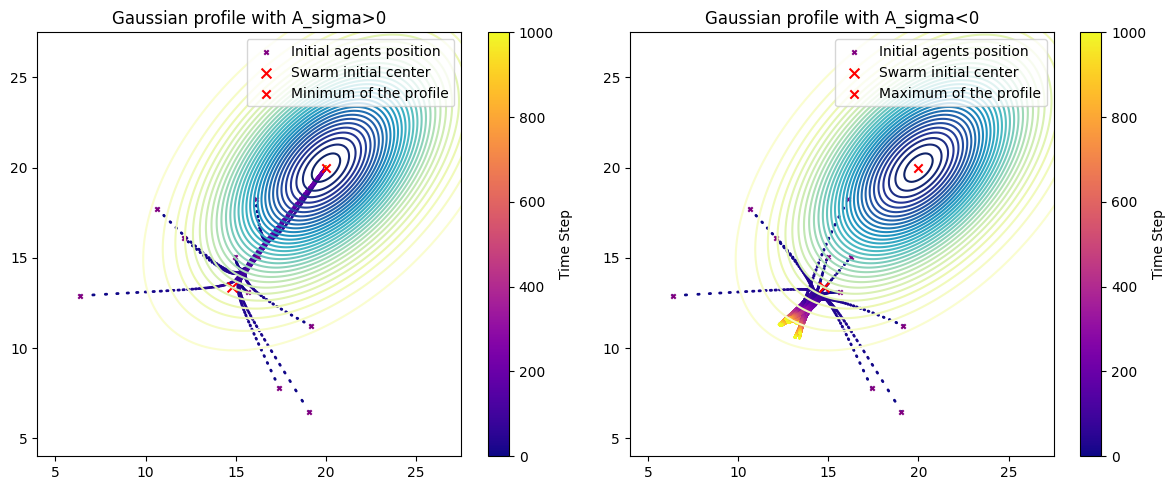

In [ ]:
agents_sw = [quadratic_motion[f'Agent {i}'][0] for i in range(10)]
# Define the mean and covariance matrix for the Gaussian distribution
covariance = np.array([[1, 0.5], [0.5, 1]])
x_, y_ =  np.mgrid[3.5:30:0.1, 3.5:30:0.1]
pos = np.dstack((x_, y_))
# Create a multivariate normal distribution
gaussian = multivariate_normal(c_sigma, 15*covariance)
# Evaluate the probability density function (PDF) at each point in the grid
z_ = gaussian.pdf(pos)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for agent_id in range(M):
    data = g_motion[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax1.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
x_coordinates = [point[0] for point in agents_sw]
y_coordinates = [point[1] for point in agents_sw]
ax1.contour(x_, y_, z_, levels=30, cmap='YlGnBu')
ax1.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agents position')
ax1.scatter(central_point[0], central_point[1], color='red', marker='x', s=50, label='Swarm initial center')
ax1.scatter(*c_sigma, marker='x', color='red', label='Minimum of the profile')
ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax1.set_xlim(4, 27.5)
ax1.set_ylim(4, 27.5)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Gaussian profile with A_sigma>0')
ax1.legend()

# Plot in the second subplot
ax2.set_xlim(4, 27.5)
ax2.set_ylim(4, 27.5)

for agent_id in range(M):
    data = g_motion_neg[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    ax2.scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
x_coordinates = [point[0] for point in agents_sw]
y_coordinates = [point[1] for point in agents_sw]
ax2.contour(x_, y_, z_, levels=30, cmap='YlGnBu')
ax2.scatter(x_coordinates, y_coordinates, marker='x', s=10, color='purple', label='Initial agents position')
ax2.scatter(central_point[0], central_point[1], color='red', marker='x', s=50, label='Swarm initial center')
ax2.scatter(*c_sigma, marker='x', color='red', label='Maximum of the profile')
ax2.colorbar = plt.colorbar(ax2.collections[0], label='Time Step')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Gaussian profile with A_sigma<0')
ax2.legend()

plt.tight_layout()
plt.show()


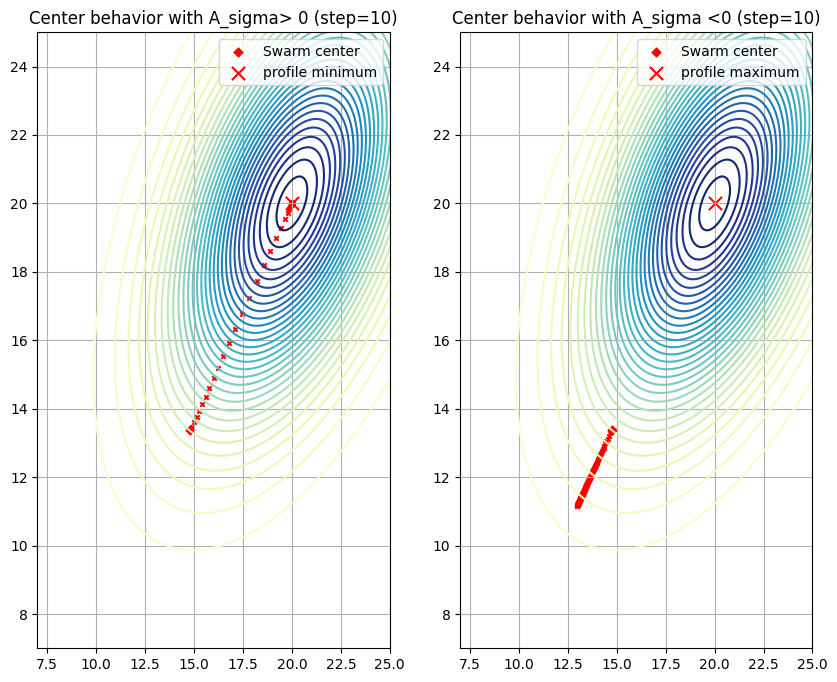

In [ ]:
#central_point
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

for c in g_center[::10]:
    c1,c2 = c[0],c[1]
    ax1.scatter(c1, c2, color='red', marker='x', s=10)

for c in g_center_neg[::10]:
    c1,c2 = c[0],c[1]
    ax2.scatter(c1, c2, color='red', marker='x', s=10)

# Plot central point to identify the center with respect to the swarm tends to aggregate
ax1.contour(x_, y_, z_, levels=30, cmap='YlGnBu')
ax2.contour(x_, y_, z_, levels=30, cmap='YlGnBu')
ax1.scatter(central_point[0], central_point[1], color='red', marker='D',s=20, label='Swarm center')
ax2.scatter(central_point[0], central_point[1], color='red', marker='D',s=20, label='Swarm center')
ax1.scatter(c_sigma[0],c_sigma[1], color='red', marker='x',s=90, label='profile minimum')
ax2.scatter(c_sigma[0],c_sigma[1], color='red', marker='x',s=90, label='profile maximum')
ax1.set_xlim(7, 25)
ax1.set_ylim(7, 25)
#ax1.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax1.set_title('Center behavior with A_sigma> 0 (step=10)')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.legend()
ax1.grid(True)

ax2.set_xlim(7, 25)
ax2.set_ylim(7, 25)
#ax2.colorbar = plt.colorbar(ax1.collections[0], label='Time Step')
ax2.set_title('Center behavior with A_sigma <0 (step=10)')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

parlare del fatto che in questo profilo il gradiente non è lineare a differenza degli altri due

#Multimodal Gaussian Profile $\sigma()$

$$$$

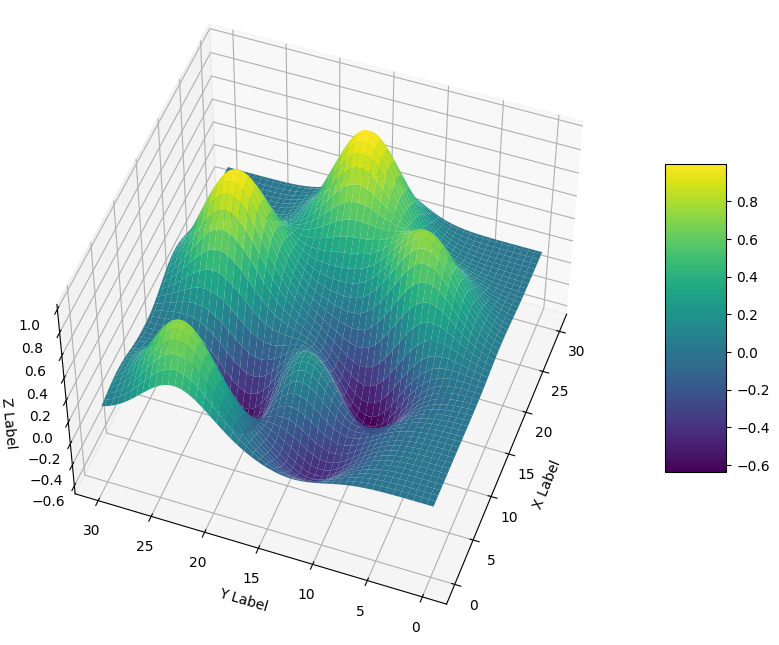

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
n = 8
A_sigma = [2 for _ in range(n-3)] + [-2,-2, -2]# [-2,-2, -2,-2,-2, -2,-2, -2]
l_sigma = 20
c_sigma = np.random.randint(low=3, high=26, size=(n, 2))
b_sigma = 0
y = np.linspace(0, 30, 100)
Y, X = np.meshgrid(y, y)
sigma_y = np.zeros((len(y), len(y)))

for i in range(len(y)):
    for j in range(len(y)):
        sum_term = 0
        for k in range(n):
            random.seed(123456)
            sum_term += A_sigma[k] / 2 * np.exp(-np.linalg.norm(np.array([X[i, j], Y[i, j]]) - c_sigma[k])**2 / l_sigma)
        sigma_y[i, j] = sum_term + b_sigma

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Finding minimum value and its indices
min_val = np.min(sigma_y)
min_indices = np.where(sigma_y == min_val)

# Plotting surface
surf = ax.plot_surface(X, Y, sigma_y, cmap='viridis')

# Coloring minimum points differently
sigma_y_masked = np.ma.masked_where(sigma_y != min_val, sigma_y)
ax.plot_surface(X, Y, sigma_y_masked, cmap='coolwarm')

# Additional settings
ax.view_init(elev=50, azim=-160)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Adding color bar
plt.show()


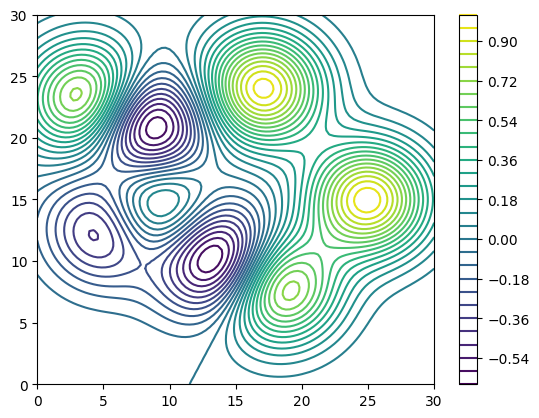

In [ ]:
#Create the contour plot
plt.contour(X, Y, sigma_y, levels=30)#, colors=['blue', 'green', 'red'], linestyles=['solid', 'dashed', 'dotted'])
plt.xlim(0,30)
plt.colorbar()
plt.show()

In [ ]:
# n = 10
# A_sigma = [2 for _ in range(n-3)] + [-2, -2, -2]
# l_sigma = 20
# c_sigma = np.random.randint(low=3, high=26, size=(n, 2))
l_sigma = [20 for i in range(n)]
gaussian_parameters = list(zip(A_sigma,c_sigma, l_sigma))
gaussian_parameters

[(2, array([17, 24]), 20),
 (2, array([ 4, 23]), 20),
 (2, array([25, 15]), 20),
 (2, array([18,  8]), 20),
 (2, array([ 8, 14]), 20),
 (-2, array([14, 10]), 20),
 (-2, array([ 6, 13]), 20),
 (-2, array([ 8, 21]), 20)]

In [ ]:
# def sum_ratio(A,l):
#   ratio = 0
#   for i in range(len(A)):
#     for j in range(len(l)):
#       ratio += A[i]/l[j]
#   return ratio


# def multig_center_motion(swarm ,A_sigma,l_sigma, c_sigma):
#   normalization = -1/(swarm.shape[0])
#   center = np.mean(swarm, axis=0)

#   for k in range(len(l_sigma)):
#     for i in range(len(A_sigma)):
#       ratio = 0
#       for j in range(len(c_sigma)):
#           summation = 0
#           ratio += sum_ratio(A_sigma[i], l_sigma[k])

#           for x_i in swarm:
#             diff = x_i - c_sigma[j]
#             e = -(np.linalg.norm(diff)**2)/l_sigma
#             exp = np.exp(e)
#             summation += diff*exp

#           grad_mean = (-ratio) * summation
#       # print(grad_mean)
#           motion = center - grad_mean
#       # center_direction.append(motion)

#   return motion #center_direction


In [ ]:
#multig_center_motion(data_points,A_sigma,l_sigma, c_sigma)

In [ ]:
gaussian_pie = list(zip( A_sigma,c_sigma,l_sigma))
def mean_ratio(gaussian_pie):
  for i in gaussian_pie:
    A_sigma_medio, l_sigma_medio = np.mean(A_sigma), np.mean(l_sigma)
  return A_sigma_medio, l_sigma_medio
mean_ratio(gaussian_pie)

(0.5, 20.0)

In [ ]:
def grad_multig(data, gaussian_pie):
   A_sigma_medio, l_sigma_medio = mean_ratio(gaussian_pie)
   for _ in gaussian_pie:
    A_sigma,c_sigma, l_sigma = _
    #print(A_sigma,c_sigma, l_sigma)
    sum = 0
    single_grad = grad_gaussian(data, A_sigma_medio, l_sigma_medio, c_sigma)
    sum += single_grad
    #print(sum)

   #print('ciclo su parametri finito')
   nabla = sum
   return nabla

grad_multig(data_points,gaussian_parameters)

array([[ 2.71831874e-02, -3.36302965e-02],
       [ 4.75655260e-06, -4.16056786e-06],
       [-1.33818187e-03, -6.69401745e-03],
       [ 1.16918863e-03, -8.41304104e-04],
       [ 4.51460502e-04, -4.65984113e-04],
       [ 1.33859207e-02, -1.58517655e-02],
       [ 5.16903392e-03, -1.75779719e-03],
       [ 1.61448398e-08, -2.12030102e-08],
       [ 2.65635259e-03, -2.26237180e-03],
       [ 4.69385894e-07, -6.59013245e-07]])

In [ ]:
def multig_motion(swarms, iterations, epsilon, A_sigma,c_sigma,l_sigma, interactions_values):
  #unpack interactions coefficients and initialize empty lists to store directions of center and agents of the swarm
  attraction_value, repulsion_value, c_value = interactions_values
  center_direction = []
  desc_direction = []
  interactions = []
  center_direction.append(np.mean(swarms,axis=0)) #append starting center position of the swarm
  desc_direction.append(swarms) #append starting position of the agents
  inter = g_pair(swarms, attraction_value, repulsion_value, c_value) #compute g() starting attraction/repulsion function
  interactions.append(inter)

  gaussian_pie = list(zip( A_sigma,c_sigma,l_sigma))
  for k in range(iterations):
    grad = grad_multig(desc_direction[k-1], gaussian_pie) #Compute the gradient each time on the updated position of the agents in the profile;
    #  print(grad)
    #  print('----')
    g_ = g_pair(interactions[k-1], attraction_value, repulsion_value, c_value) #this get back a matrix (Mx2)
    interactions.append(g_)

    step = desc_direction[k-1] - grad - (epsilon * interactions[k-1])
    desc_direction.append(step)
    # #let's compute the update of the center motion
    # center_path = multig_center_motion(desc_direction[-1], A_sigma,l_sigma, c_sigma)
    # #print(center_path)
    # center_direction.append(center_path)


    #Let's plug the agents positions updates in a dictionary
    agents = {}
    for agent in range(M):
      swrm = {f'Agent {agent}': np.array([i[agent] for i in desc_direction])}
      agents.update(swrm)

  return agents#, center_direction)

In [ ]:
inter_repulsion =[0.01, 0.4,.1]
inter_values =[0.01, 0.4,.01]
aggregatevi =[0.09, 0.4,.01 ]

In [ ]:
#grad = grad_multig(data_points,A_sigma, l_sigma,c_sigma)
M_,deviation_, central_point_ = 10, random.uniform(2.5,3.5), np.array([15.0, 14.0])
dp = generate_swarm(M_,deviation_, central_point_)
#set up with repulsion dominates attraction
set_up1 = multig_motion(dp, 1000, .1, A_sigma,c_sigma,l_sigma, inter_repulsion)
set_up2 = multig_motion(data_points, 1000, .1, A_sigma,c_sigma,l_sigma, inter_repulsion)
#set up with linear attraction bigger
set_up3 = multig_motion(dp, 1000, .1, A_sigma,c_sigma,l_sigma, inter_values)
set_up4 = multig_motion(data_points, 1000, .1, A_sigma,c_sigma,l_sigma, inter_values)
#ag['Agent 0'][::100]

The random selected devation of users position from the center of the swarm is 3.3056271362589;


In [ ]:
set_up5 = multig_motion(dp, 1000, .1, A_sigma,c_sigma,l_sigma, aggregatevi)
set_up6 = multig_motion(data_points, 1000, .1, A_sigma,c_sigma,l_sigma, aggregatevi)

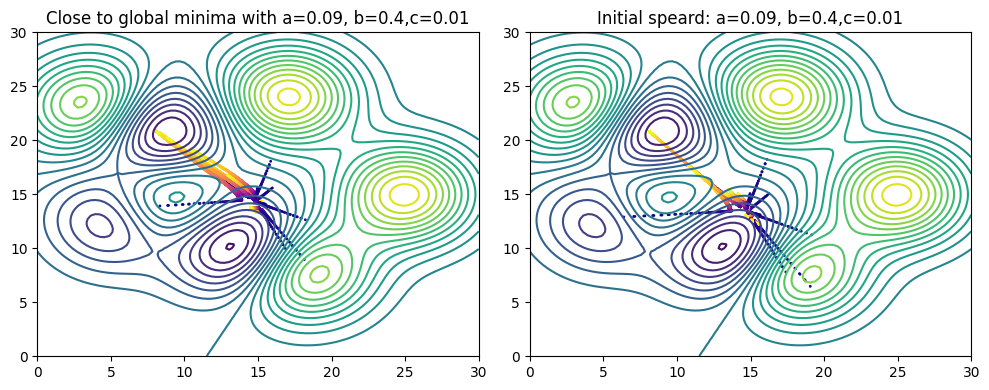

In [ ]:
# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot data for the first set of agents
axs[0].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up5[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[0].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[0].set_xlim(0, 30)
axs[0].set_title(f'Close to global minima with a={aggregatevi[0]}, b={aggregatevi[1]},c={aggregatevi[2]}')

# Plot data for the second set of agents
axs[1].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up6[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[1].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[1].set_xlim(0, 30)
axs[1].set_title(f'Initial speard: a={aggregatevi[0]}, b={aggregatevi[1]},c={aggregatevi[2]}')

# Add colorbars to both subplots
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=axs)

plt.tight_layout()
plt.show()


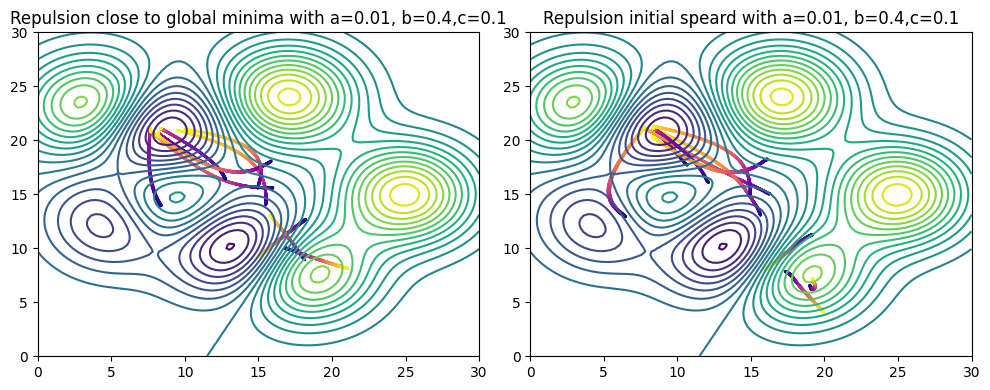

In [ ]:
# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot data for the first set of agents
axs[0].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up1[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[0].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[0].set_xlim(0, 30)
axs[0].set_title(f'Repulsion close to global minima with a={inter_repulsion[0]}, b={inter_repulsion[1]},c={inter_repulsion[2]}')

# Plot data for the second set of agents
axs[1].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up2[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[1].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[1].set_xlim(0, 30)
axs[1].set_title(f'Repulsion initial speard with a={inter_repulsion[0]}, b={inter_repulsion[1]},c={inter_repulsion[2]}')

# Add colorbars to both subplots
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=axs)

plt.tight_layout()
plt.show()


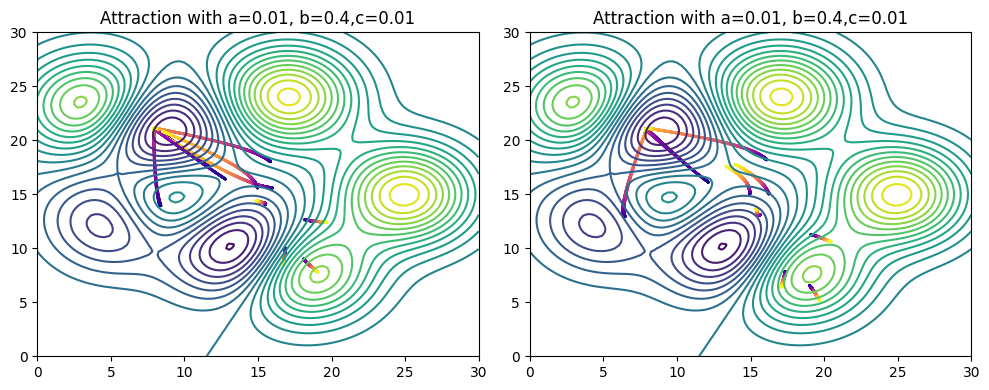

In [ ]:
# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot data for the first set of agents
axs[0].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up3[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[0].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[0].set_xlim(0, 30)
axs[0].set_title(f'Attraction with a={inter_values[0]}, b={inter_values[1]},c={inter_values[2]}')

# Plot data for the second set of agents
axs[1].contour(X, Y, sigma_y, levels=20)
for agent_id in range(M):
    data = set_up4[f'Agent {agent_id}']
    x = data[:, 0]
    y = data[:, 1]
    time = np.arange(len(x))
    axs[1].scatter(x, y, c=time, cmap='plasma', marker='o', s=1)
axs[1].set_xlim(0, 30)
axs[1].set_title(f'Attraction with a={inter_values[0]}, b={inter_values[1]},c={inter_values[2]}')

# Add colorbars to both subplots
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='plasma'), ax=axs)

plt.tight_layout()
plt.show()

